# Hantush type curves

## Type curve, Hantush's well function

Hantush's well function involves leakage from an overlying layer. The leakage is parameterized by the characteristic length, with the simbol $\lambda$

$$ \lambda = \sqrt{ kD c}$$

where $c$ [dimentions time] is the vertical resistance of the overlying aquitard. It can also be expressed as $c = b/k_v$ with $b$ the thickness of the overlying aquitard and $k_v$ its averaged vertical conductivity.

with $\rho = r/\lambda$, Hantush's well function is given by

$$ W_h(u, \rho) = \intop_u^\infty \frac {e^{-y - \frac{ \left( \frac {\rho} 2 \right)^2} {y}}} {y}  dy $$



In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

## Compute Hantush's well function by integration

In [62]:
def W(u, rho):
    if np.isscalar(u):
        u = np.asarray([u])

    w = np.zeros_like(u)
    for i, uu in enumerate(u):
        y = np.logspace(np.log10(uu), 1)
        arg = np.exp(-y - (rho/2) ** 2 / y ) / y
        w[i] = np.sum(np.diff(y) * 0.5 * (arg[:-1]+ arg[1:]))
    return w

In [63]:
W(0.2, 0.1)

array([ 1.21815738])

In [64]:
np.isscalar(0.3)

True

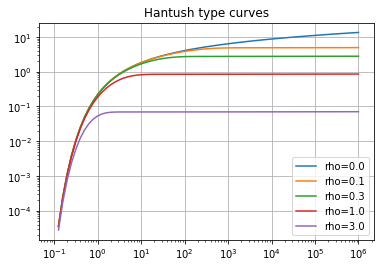

In [65]:
rhos = [0., 0.1, 0.3, 1, 3]

u = np.logspace(-6, 1, 71)

plt.title('Hantush type curves')
plt.xscale('log')
plt.yscale('log')
plt.grid()
for rho in rhos:
    w = W(u, rho)
    plt.plot(1/u, w, label='rho={:.1f}'.format(rho))
    
plt.legend()
plt.show()

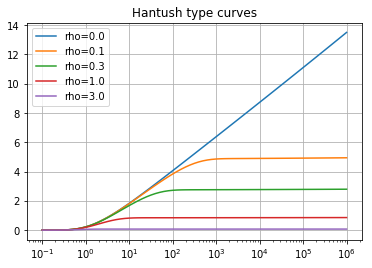

In [67]:
rhos = [0., 0.1, 0.3, 1, 3]

u = np.logspace(-6, 1, 71)

plt.title('Hantush type curves')
plt.xscale('log')
plt.yscale('linear')
plt.grid()
for rho in rhos:
    w = W(u, rho)
    plt.plot(1/u, w, label='rho={:.1f}'.format(rho))
    
plt.legend()
plt.show()